In [1]:
#load pandas and numpy modules
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
#read raw data
df = pd.read_csv('Book1.csv')

if df.isnull().values.any():
    print ('missing values!')
    #raise ValueError
else:
    print('pass')

removed_mol = ["ASD007", "ASD012", "ASD019", "ASD021", "D372-0163"]
df = df[~df['MolID'].isin(removed_mol)]
df

missing values!


,MolID,A2_pore/wt,A2_pd3-pore/wt,BalabanJ,BertzCT,Chi0,Chi1,Chi0n,Chi1n,Chi2n,...,Asphericity,Eccentricity,InertialShapeFactor,NPR1,NPR2,PMI1,PMI2,PMI3,RadiusOfGyration,SpherocityIndex
0,1500272,1.374142,1.818078,1.429,1053.463,24.526,17.092,21.986,13.271,10.508,...,0.29,0.93,0.000,0.36,0.83,3154.07,7485.30,8960.40,4.71,0.26
1,1501007,1.653595,1.830065,1.868,592.306,16.113,10.436,12.477,7.260,5.618,...,0.61,0.98,0.001,0.16,0.93,794.20,4993.82,5322.33,4.43,0.13
2,1501150,1.263575,1.288084,2.143,675.300,17.035,10.863,13.464,7.701,5.718,...,0.40,0.96,0.001,0.27,0.81,1211.39,3612.58,4454.32,3.82,0.13
3,1503100,1.068571,0.906404,1.453,912.788,20.096,13.507,16.903,9.734,7.208,...,0.50,0.96,0.001,0.24,0.92,1350.32,6512.23,6975.32,4.50,0.21
4,1503243,1.429834,1.796096,1.847,673.567,17.527,11.469,13.852,8.151,6.130,...,0.63,0.98,0.001,0.15,0.93,890.41,6027.54,6455.60,4.67,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,ST074710,1.166063,1.158213,1.415,1088.933,19.510,13.602,16.072,9.689,7.605,...,0.59,0.98,0.001,0.17,0.91,1256.24,7224.17,7862.80,4.82,0.12
82,ST074716,1.406250,1.740461,1.409,1037.250,20.924,14.640,17.649,10.528,7.733,...,0.57,0.98,0.001,0.18,0.91,1626.09,8789.70,9674.41,5.13,0.12
83,D724-0097,1.282500,1.233125,2.330,975.310,17.974,12.079,15.057,8.546,6.575,...,0.18,0.86,0.000,0.50,0.66,1707.18,2245.58,3445.24,3.45,0.21
84,ciprofloxacin,1.239171,1.165532,1.949,882.760,16.845,11.559,13.127,8.224,6.472,...,0.45,0.97,0.001,0.24,0.82,1013.06,3494.43,4263.15,3.74,0.09


In [2]:
X_raw = df.iloc[:,3:]
print(X_raw.head())
Y = df.iloc[:,1] # A2_pore/wt
print(Y.head())
Yb = (Y > np.median(Y)).astype(int) # binary classification split by median
print(Yb)

   BalabanJ   BertzCT    Chi0    Chi1   Chi0n   Chi1n   Chi2n  Chi3n  Chi4n  \
0     1.429  1053.463  24.526  17.092  21.986  13.271  10.508  8.949  7.085   
1     1.868   592.306  16.113  10.436  12.477   7.260   5.618  3.565  2.395   
2     2.143   675.300  17.035  10.863  13.464   7.701   5.718  4.335  3.048   
3     1.453   912.788  20.096  13.507  16.903   9.734   7.208  5.436  3.662   
4     1.847   673.567  17.527  11.469  13.852   8.151   6.130  4.164  2.612   

    Chi0v  ...  Asphericity  Eccentricity  InertialShapeFactor  NPR1  NPR2  \
0  21.986  ...         0.29          0.93                0.000  0.36  0.83   
1  12.477  ...         0.61          0.98                0.001  0.16  0.93   
2  14.280  ...         0.40          0.96                0.001  0.27  0.81   
3  16.903  ...         0.50          0.96                0.001  0.24  0.92   
4  13.852  ...         0.63          0.98                0.001  0.15  0.93   

      PMI1     PMI2     PMI3  RadiusOfGyration  Spheroci

In [3]:
# scale data using robust scaler
from sklearn.preprocessing import RobustScaler, normalize

scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_raw), columns=X_raw.columns)

#X_scaled = pd.DataFrame(normalize(X_raw), columns=X_raw.columns)
X_scaled.head()

,BalabanJ,BertzCT,Chi0,Chi1,Chi0n,Chi1n,Chi2n,Chi3n,Chi4n,Chi0v,...,Asphericity,Eccentricity,InertialShapeFactor,NPR1,NPR2,PMI1,PMI2,PMI3,RadiusOfGyration,SpherocityIndex
0,-0.592908,0.320082,0.959470,0.975976,1.222576,1.072732,1.269823,1.945279,2.467311,1.300478,...,-0.653846,-1.00,-1.0,0.7500,-0.071429,2.611596,0.653941,0.613214,0.583333,1.875
1,0.029787,-0.875948,-0.611879,-0.689690,-0.557469,-0.540526,-0.612394,-0.943133,-1.017088,-0.592991,...,0.576923,0.25,0.0,-0.5000,0.642857,-0.689383,0.112867,-0.113734,0.324074,0.250
2,0.419858,-0.660700,-0.439671,-0.582833,-0.372707,-0.422169,-0.573903,-0.530043,-0.531947,-0.233971,...,-0.230769,-0.25,0.0,0.1875,-0.214286,-0.105819,-0.187096,-0.287177,-0.240741,0.250
3,-0.558865,-0.044765,0.132051,0.078829,0.271060,0.123457,-0.000385,0.060622,-0.075780,0.288331,...,0.153846,-0.25,0.0,0.0000,0.571429,0.088516,0.442619,0.216562,0.388889,1.250
4,0.000000,-0.665194,-0.347777,-0.431181,-0.300075,-0.301396,-0.415319,-0.621781,-0.855869,-0.319196,...,0.653846,0.25,0.0,-0.5625,0.642857,-0.554805,0.337360,0.112713,0.546296,0.000


In [54]:
import seaborn as sns

print('# of features before drop:', X_scaled.shape[1])

#create correlation matrix
corr_matrix_before = X_scaled.corr().abs() # absolute value of corralation matrix

#plot heatmap before removing highly correlated features
# fig = plt.figure(figsize=(11,9))
# fig = sns.heatmap(corr_matrix_before, cmap = 'Blues', square=True)
# plt.title('Features before removal' ,fontsize = 20)
# plt.tight_layout()

#set a cutoff threshold (usually 0.9 or 0.85)
cut_th = 0.9

#select upper triangle of correlation matrix
upper = corr_matrix_before.where(np.triu(np.ones(corr_matrix_before.shape), k=1).astype(np.bool)) # first build a boolean upper triangle, then use where() to extract upper triangle from correlation matrix

#drop highly correlated features based on set threshold
to_drop = [column for column in upper.columns if any(upper[column] > cut_th)] # remove columns that has correlation with any value larger than threshold
'''two problems: 1. if multiple features are correlated, only the first one is kept; 2. may remove too many features, since the removal of "bridge" feature makes the rest features non-correlated'''
to_drop.extend(['BertzCT','ExactMolWt','Ipc','NHOHCount','NOCount','NumRadicalElectrons','NumSaturatedCarbocycles','NumSaturatedHeterocycles','NumSaturatedRings','NumValenceElectrons','PEOE_VSA1','PEOE_VSA2','PEOE_VSA3','PEOE_VSA4','PEOE_VSA5','PEOE_VSA6','PEOE_VSA7','PEOE_VSA8','PEOE_VSA9','PEOE_VSA10','PEOE_VSA11','PEOE_VSA12','PEOE_VSA13','PEOE_VSA14','RingCount','SMR_VSA1','SMR_VSA2','SMR_VSA3','SMR_VSA4','SMR_VSA5','SMR_VSA6','SMR_VSA7','SMR_VSA8','SMR_VSA9','SMR_VSA10','SlogP_VSA1','SlogP_VSA2','SlogP_VSA3','SlogP_VSA4','SlogP_VSA5','SlogP_VSA6','SlogP_VSA7','SlogP_VSA8','SlogP_VSA9','SlogP_VSA10','SlogP_VSA11','SlogP_VSA12','VSA_EState1','VSA_EState2','VSA_EState3','VSA_EState4','VSA_EState5','VSA_EState6','VSA_EState7','VSA_EState8','VSA_EState9','VSA_EState10','qed','fr_Al_COO','fr_Al_OH','fr_Al_OH_noTert','fr_ArN','fr_Ar_COO','fr_Ar_N','fr_Ar_NH','fr_Ar_OH','fr_COO','fr_COO2','fr_C_O','fr_C_O_noCOO','fr_C_S','fr_HOCCN','fr_Imine','fr_NH0','fr_NH1','fr_NH2','fr_N_O','fr_Ndealkylation1','fr_Ndealkylation2','fr_Nhpyrrole','fr_SH','fr_aldehyde','fr_alkyl_carbamate','fr_alkyl_halide','fr_allylic_oxid','fr_amide','fr_amidine','fr_aniline','fr_aryl_methyl','fr_azide','fr_azo','fr_barbitur','fr_benzene','fr_benzodiazepine','fr_bicyclic','fr_diazo','fr_dihydropyridine','fr_epoxide','fr_ester','fr_ether','fr_furan','fr_guanido','fr_halogen','fr_hdrzine','fr_hdrzone','fr_imidazole','fr_imide','fr_isocyan','fr_isothiocyan','fr_ketone','fr_ketone_Topliss','fr_lactam','fr_lactone','fr_methoxy','fr_morpholine','fr_nitrile','fr_nitro','fr_nitro_arom','fr_nitro_arom_nonortho','fr_nitroso','fr_oxazole','fr_oxime','fr_para_hydroxylation','fr_phenol','fr_phenol_noOrthoHbond','fr_phos_acid','fr_phos_ester','fr_piperdine','fr_piperzine','fr_priamide','fr_prisulfonamd','fr_pyridine','fr_quatN','fr_sulfide','fr_sulfonamd','fr_sulfone','fr_term_acetylene','fr_tetrazole','fr_thiazole','fr_thiocyan','fr_thiophene','fr_unbrch_alkane','fr_urea','Eccentricity']) # brings to much variation " EState_VSA5"]
X_cor = X_scaled.drop(columns = to_drop)

#plot heatmap after removing highly correlated features
corr_matrix_after = X_cor.corr().abs()
# f, ax = plt.subplots(figsize=(11, 9))
# ax = sns.heatmap(corr_matrix_after, cmap = 'Blues', square=True)
# plt.title('Features after removal' ,fontsize = 20)
# plt.tight_layout()
#plt.savefig(img_dir + 'corr_matrix_after.png')

print('# of features after drop:', X_cor.shape[1])
print('# of features dropped:', len(to_drop))
print("Dropped features:")
print(to_drop)

# of features before drop: 210
# of features after drop: 37
# of features dropped: 194
Dropped features:
['Chi0', 'Chi1', 'Chi0n', 'Chi1n', 'Chi2n', 'Chi3n', 'Chi4n', 'Chi0v', 'Chi1v', 'Chi2v', 'Chi3v', 'Chi4v', 'ExactMolWt', 'FpDensityMorgan2', 'FpDensityMorgan3', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Kappa1', 'Kappa2', 'LabuteASA', 'MaxEStateIndex', 'MinAbsPartialCharge', 'MinPartialCharge', 'MolMR', 'MolWt', 'NumAliphaticRings', 'NumHDonors', 'NumSaturatedRings', 'NumValenceElectrons', 'SlogP_VSA6', 'SlogP_VSA11', 'VSA_EState6', 'fr_Al_OH_noTert', 'fr_COO', 'fr_COO2', 'fr_C_O_noCOO', 'fr_NH0', 'fr_Nhpyrrole', 'fr_alkyl_carbamate', 'fr_amidine', 'fr_benzene', 'fr_ether', 'fr_methoxy', 'fr_nitro_arom_nonortho', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_pyridine', 'NPR1', 'PMI3', 'RadiusOfGyration', 'BertzCT', 'ExactMolWt', 'Ipc', 'NHOHCount', 'NOCount', 'NumRadicalElectrons', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'PEOE_VSA1'

In [4]:
# use certain descriptors
# descriptors = ['fr_NH1', 'FpDensityMorgan2', 'EState_VSA3', 'MinAbsEStateIndex', 'Asphericity', 'fr_Ar_N', 'PEOE_VSA6', 'Kappa3', 'fr_halogen', 'SMR_VSA4', 'VSA_EState4']
descriptors = ['FpDensityMorgan2', 'LabuteASA', 'MaxAbsEStateIndex', 'TPSA', 'EState_VSA7', 'Asphericity', 'Chi3v', 'MaxPartialCharge', 'PMI2', 'MaxAbsPartialCharge', 'NPR1', 'EState_VSA4', 'MinPartialCharge', 'Kappa3', 'MolLogP', 'NumHAcceptors', 'EState_VSA1', 'FractionCSP3', 'EState_VSA11', 'EState_VSA5', 'NumAliphaticCarbocycles', 'EState_VSA2', 'EState_VSA6', 'NumAromaticHeterocycles', 'EState_VSA9', 'BalabanJ', 'HallKierAlpha', 'EState_VSA3', 'MinAbsEStateIndex', 'EState_VSA8', 'InertialShapeFactor', 'NumAromaticCarbocycles', 'NumAliphaticHeterocycles']
X_given = X_scaled[descriptors]

In [5]:
# PCA

def PCA_plot(X, Y):
   from sklearn.decomposition import PCA
   pca = PCA(n_components=3, svd_solver='full').fit(X)
   print(pca.explained_variance_ratio_)

   X_pca = pca.transform(X)
   print(X_pca.shape)

   # 3d
   fig = plt.figure(figsize=(10,8))
   # 
   ax = fig.gca(projection='3d')
   scatter3D = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=Y, cmap='bwr', edgecolors='k')
   ax.set_xlabel("PC1")
   ax.set_ylabel("PC2")
   ax.set_zlabel("PC3")
   cbar = plt.colorbar(scatter3D)
   cbar.set_label('A2_pore/wt ratio', rotation=270, va='bottom')
   # for i in range(X_pca.shape[0]):
   #    ax.text(X_pca[i,0], X_pca[i,1], X_pca[i,2], str(i))
   
   plt.show()

   # 2D
   fig = plt.figure(figsize=(10,8))
   scatter2D = plt.scatter(X_pca[:,0], X_pca[:,1], c=Y, cmap='bwr', edgecolors='k')
   plt.xlabel("PC1")
   plt.ylabel("PC2")
   cbar = plt.colorbar(scatter2D)
   cbar.set_label('A2_pore/wt ratio', rotation=270, va='bottom')
   plt.show()
   # annotate each point

   plt.show()

   pca_contribution = pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2','PC-3'])
   print(pca_contribution)

   return 0

[0.27194055 0.17263406 0.11366102]
(81, 3)


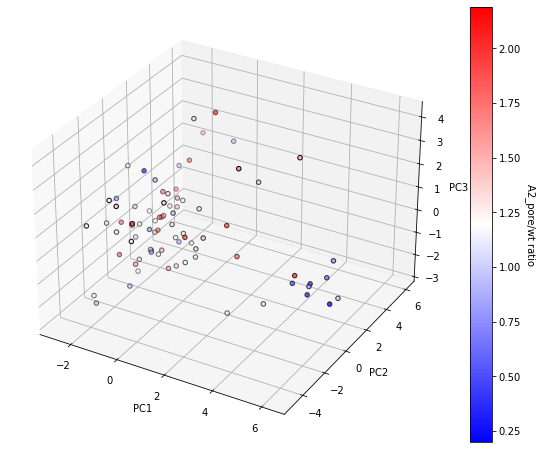

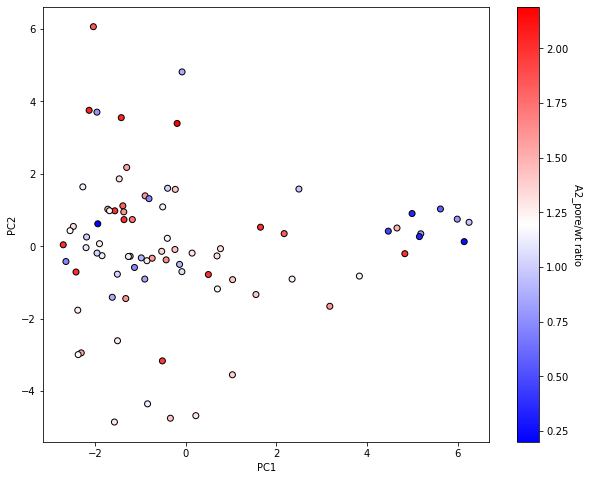

      FpDensityMorgan2  LabuteASA  MaxAbsEStateIndex      TPSA  EState_VSA7  \
PC-1         -0.269948   0.272121           0.013663  0.103870     0.183956   
PC-2          0.072937   0.058202           0.589969  0.164394    -0.048484   
PC-3          0.003796   0.292442          -0.144255  0.067655    -0.113639   

      Asphericity     Chi3v  MaxPartialCharge      PMI2  MaxAbsPartialCharge  \
PC-1     0.199767  0.183117          0.031783  0.514910            -0.086945   
PC-2     0.030908  0.027627          0.036507  0.074932             0.124089   
PC-3    -0.248309  0.373668         -0.051531 -0.063062             0.060536   

      ...  NumAromaticHeterocycles  EState_VSA9  BalabanJ  HallKierAlpha  \
PC-1  ...                -0.131154    -0.009424 -0.196467      -0.362294   
PC-2  ...                -0.016516    -0.099485  0.001132      -0.121173   
PC-3  ...                 0.187339     0.242879 -0.098985      -0.088884   

      EState_VSA3  MinAbsEStateIndex  EState_VSA8  Inerti

0

In [6]:
PCA_plot(X_given, Y)

[0.31648866 0.18117849 0.11642586]
(81, 3)


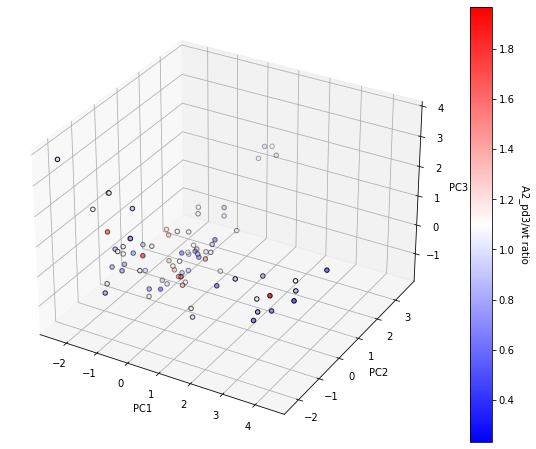

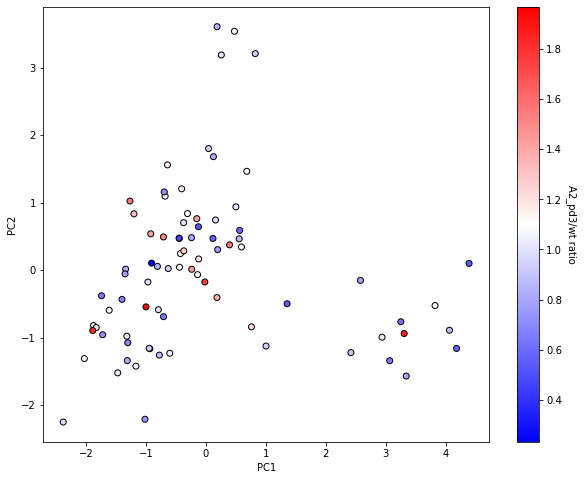

        fr_NH1  FpDensityMorgan2  EState_VSA3  MinAbsEStateIndex  Asphericity  \
PC-1  0.666497         -0.408596    -0.029850           0.260022     0.289986   
PC-2 -0.188948          0.075381    -0.466334           0.542042    -0.165392   
PC-3  0.166441         -0.069258    -0.090427           0.433389     0.138942   

       fr_Ar_N  PEOE_VSA6    Kappa3  fr_halogen  SMR_VSA4  VSA_EState4  
PC-1 -0.157183  -0.038259  0.245495   -0.311085 -0.047185     0.225384  
PC-2  0.316414   0.067449 -0.121364   -0.446883  0.315722     0.034697  
PC-3  0.266985   0.099748  0.191102    0.731961  0.161535    -0.269408  


0

In [50]:
PCA_plot(X_given, Y)

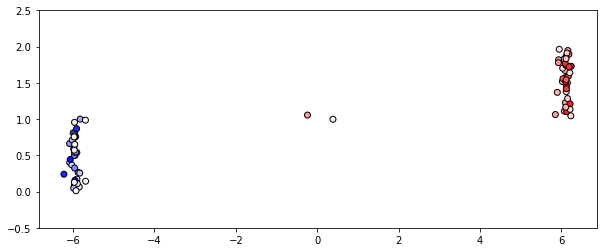

In [11]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA().fit(X_cor, Yb)

X_lda = lda.transform(X_cor)
fig = plt.figure(figsize=(10,4))
scatter1D = plt.scatter(X_lda, Yb + np.random.rand(Yb.shape[0]), c=Y, cmap='bwr', edgecolors='k')
plt.ylim(-0.5,2.5)
plt.show()

lda_contribution = np.hstack((np.array(X_cor.columns).reshape((-1,1)), lda.coef_.T))

lda_contribution_sort = np.array(sorted(lda_contribution, key=lambda row: np.abs(row[1])))

[0.31313771 0.26451255 0.18563246]
(81, 3)


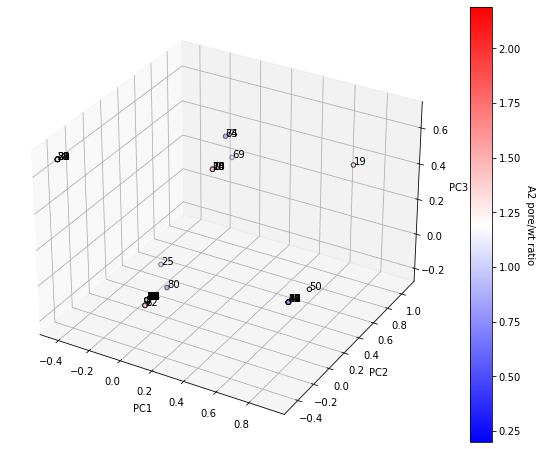

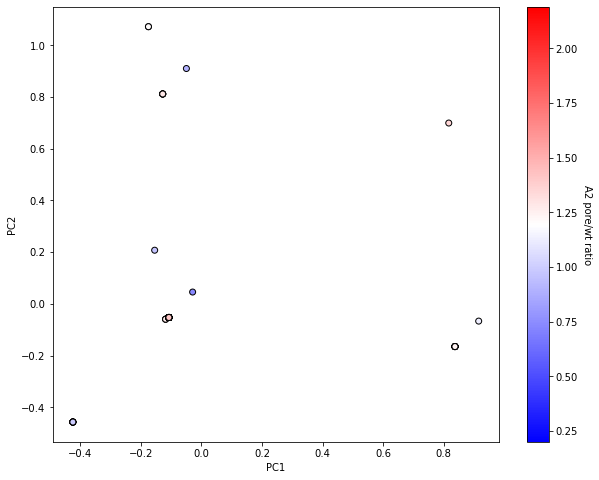

      fr_Ar_NH  NumSaturatedCarbocycles  fr_morpholine  fr_sulfonamd  \
PC-1 -0.047003                 0.943657       0.078202     -0.316862   
PC-2  0.260083                -0.112329       0.098404     -0.404107   
PC-3  0.084365                 0.295348       0.050935      0.856739   

      fr_thiophene  fr_furan  fr_imidazole  fr_oxime  
PC-1     -0.011027 -0.011027     -0.020522 -0.011027  
PC-2     -0.006529 -0.006529      0.864075 -0.006529  
PC-3     -0.033197 -0.033197      0.407124 -0.033197  


0

In [12]:
PCA_plot(X_given, Y)